In [3]:
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
import lec3_graphs as gfx
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos


df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

df['undp_hdi'].describe().round(3)

count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

In [10]:
# Generamos una nueva columna que devuelva un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()
# dentro de cada fila de nuestra base
for i, r in df.iterrows():
# si flagnull es verdadero
    if r['flagnull'] is True:
# imprime el nombre
        print(r['cname'])
# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()

Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

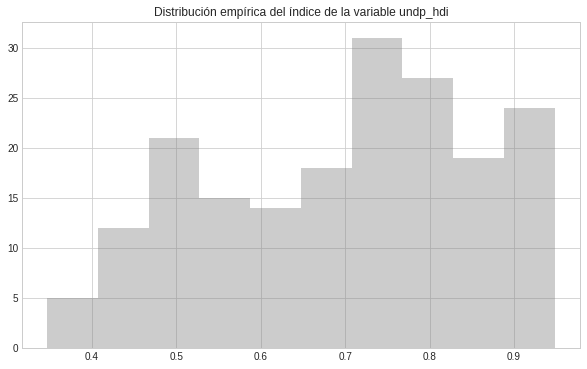

In [12]:
hdi_dropna = df['undp_hdi'].dropna();
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable undp_hdi");

In [19]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region'] ]
hdi_group.shape

hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])


hdi_group

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian
5,Antigua and Barbuda,28,0.784,10,Caribbean
6,Azerbaijan,31,0.758,1,EastEurope
7,Argentina,32,0.826,2,LatAm
8,Australia,36,0.937,5,WesternDem
9,Austria,40,0.892,5,WesternDem


In [16]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

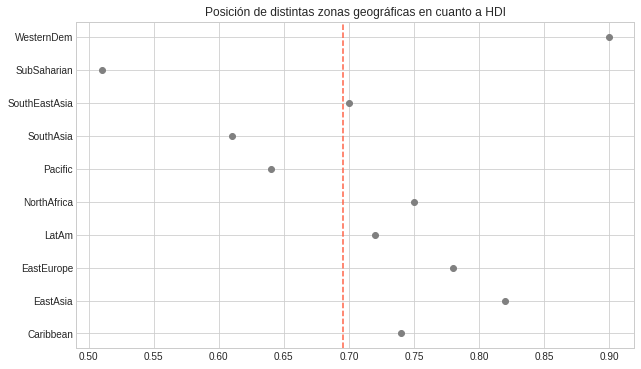

In [17]:
plt.title('Posición de distintas zonas geográficas en cuanto a HDI')
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');


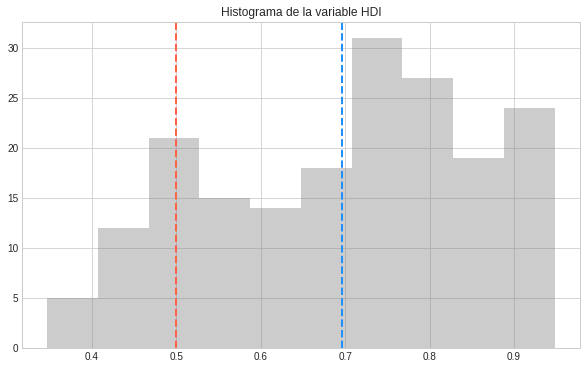

In [18]:
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2)
plt.axvline(0.5, color='tomato', linestyle='--', lw=2)
plt.title('Histograma de la variable HDI');

/home/jonathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'Histograma del IDH')

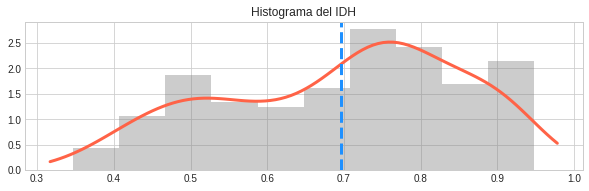

In [25]:
# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2,1,1)

# Graficamos el mismo histograma, especificando Normed para que el histograma represente densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, normed=True)

# extraemos los límites del histograma
x_min, x_max = plt.xlim()

# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)

# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma del IDH")




/home/jonathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


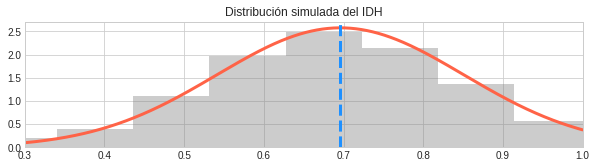

In [30]:
# El segundo gráfico
plt.subplot(2, 1, 2)
# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, normed=True)
# Fijamos los límites del eje x
plt.xlim(0.3, 1)
# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.696, np.sqrt(0.024)), color='tomato', lw=3)
plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace=0.6)

In [38]:
hdi_te = df.loc[:, ['cname', 'gol_inst'] ]
print(hdi_te[hdi_te['cname'] == 'Venezuela'])

         cname  gol_inst
190  Venezuela       2.0
